In [10]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV

In [2]:
df = pd.read_csv("../cleaned_data/train_data.csv") # Preprocessed training data
df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education_Bachelor's,...,HasDependents_No,HasDependents_Yes,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_No,HasCoSigner_Yes,Default
0,45,72928,23252,516,72,1,24.53,24,0.79,0,...,1,0,0,0,1,0,0,0,1,0
1,41,65437,15975,328,81,4,19.00,60,0.69,0,...,1,0,0,0,0,1,0,1,0,0
2,34,147083,73467,607,67,1,8.20,36,0.66,0,...,0,1,0,1,0,0,0,0,1,0
3,25,97594,165559,489,115,4,21.12,24,0.21,0,...,0,1,0,0,0,0,1,1,0,0
4,22,143415,197038,424,15,3,12.84,36,0.61,0,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163416,56,95731,78549,580,53,2,13.39,48,0.54,1,...,1,0,0,0,0,0,1,0,1,0
163417,32,46410,27511,799,57,4,14.20,48,0.41,0,...,0,1,1,0,0,0,0,0,1,0
163418,54,142603,177416,519,20,3,10.69,12,0.47,0,...,1,0,0,0,0,1,0,1,0,0
163419,50,99826,161987,613,61,3,12.31,48,0.56,0,...,0,1,0,0,0,0,1,0,1,0


In [3]:
default = np.array(df["Default"])
df.drop(columns=["Default"], inplace=True)

df["LoanTerm"] = df["LoanTerm"] / 12

We now train the adaboost classifier on the training data, using a random forest as the estimator. The hyperparameters are decided using BayesSearchCV and the best estimator is used to make the final predictions.

In [4]:
rfc = RandomForestClassifier(
    n_estimators=11,
    max_depth=5,
    criterion="gini",
    random_state=42
)

abc = AdaBoostClassifier(estimator=rfc, random_state=42)

In [5]:
params = {
    "n_estimators": [21],
    "learning_rate": (0.7, 0.9, "log-uniform")
}

grid_search = BayesSearchCV(abc, params, cv=4, n_iter=3, n_jobs=-1, random_state=42, verbose=2)

In [6]:
grid_search.fit(df, default)
model = grid_search.best_estimator_ # Get the best model

Fitting 4 folds for each of 1 candidates, totalling 4 fits


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/kandarp/.local/lib/python3.10/

[CV] END ..learning_rate=0.7759944569083485, n_estimators=21; total time= 1.1min
[CV] END ..learning_rate=0.7759944569083485, n_estimators=21; total time= 1.1min
[CV] END ..learning_rate=0.7759944569083485, n_estimators=21; total time= 1.1min
[CV] END ..learning_rate=0.7759944569083485, n_estimators=21; total time= 1.1min
Fitting 4 folds for each of 1 candidates, totalling 4 fits


/home/kandarp/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/kandarp/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/kandarp/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/kandarp/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
 

[CV] END ..learning_rate=0.8639614164051028, n_estimators=21; total time= 1.3min
[CV] END ..learning_rate=0.8639614164051028, n_estimators=21; total time= 1.3min
[CV] END ..learning_rate=0.8639614164051028, n_estimators=21; total time= 1.3min
[CV] END ..learning_rate=0.8639614164051028, n_estimators=21; total time= 1.3min
Fitting 4 folds for each of 1 candidates, totalling 4 fits


/home/kandarp/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/kandarp/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/kandarp/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/kandarp/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
 

[CV] END ..learning_rate=0.7827968124693183, n_estimators=21; total time= 1.1min
[CV] END ..learning_rate=0.7827968124693183, n_estimators=21; total time= 1.1min
[CV] END ..learning_rate=0.7827968124693183, n_estimators=21; total time= 1.1min
[CV] END ..learning_rate=0.7827968124693183, n_estimators=21; total time= 1.1min


/home/kandarp/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [7]:
model

AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=5,
                                                    n_estimators=11,
                                                    random_state=42),
                   learning_rate=0.8639614164051028, n_estimators=21,
                   random_state=42)

In [8]:
test_df = pd.read_csv("../cleaned_data/test_data.csv") # Validation data for testing the trained model

y_true = np.array(test_df["Default"])
test_df.drop(columns=["Default"], inplace=True)

# Accuracy of model on validation data
y_pred = model.predict(test_df)
accuracy_score(y_true, y_pred)

0.8844967691403955

The confusion matrix for AdaBoost is shown below.

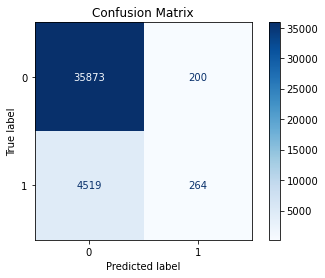

In [11]:
cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [12]:
test_df = pd.read_csv("../data/test.csv") # Test data

ids = np.array(test_df["LoanID"])
test_df.drop(columns="LoanID", inplace=True)

# Do label encoding on test data
test_df = pd.get_dummies(test_df, columns = test_df.select_dtypes(include=['object','category']).columns,dtype=int)

Now, we generate the csv file for the predictions on the actual test data. It achieves a score of 0.88768 on Kaggle.

In [13]:
submission = []

test_df["LoanTerm"] /= 12

y_pred = model.predict(test_df)

submission.append(ids)
submission.append(y_pred)

submission = np.array(submission).T
submission = pd.DataFrame(submission)

submission.to_csv("adaboost_submission.csv", header=["LoanID", "Default"], index=False)